In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
data = pd.read_excel("/content/fruits.xlsx")
data.head()


,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [31]:
data.describe()


,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


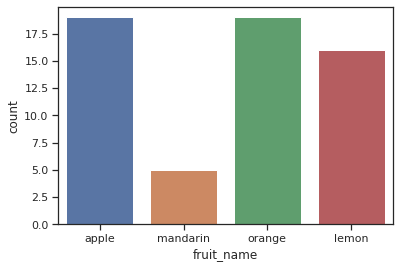

In [32]:
data["fruit_name"].unique()
sns.countplot(data['fruit_name'],label="Count")
plt.show()

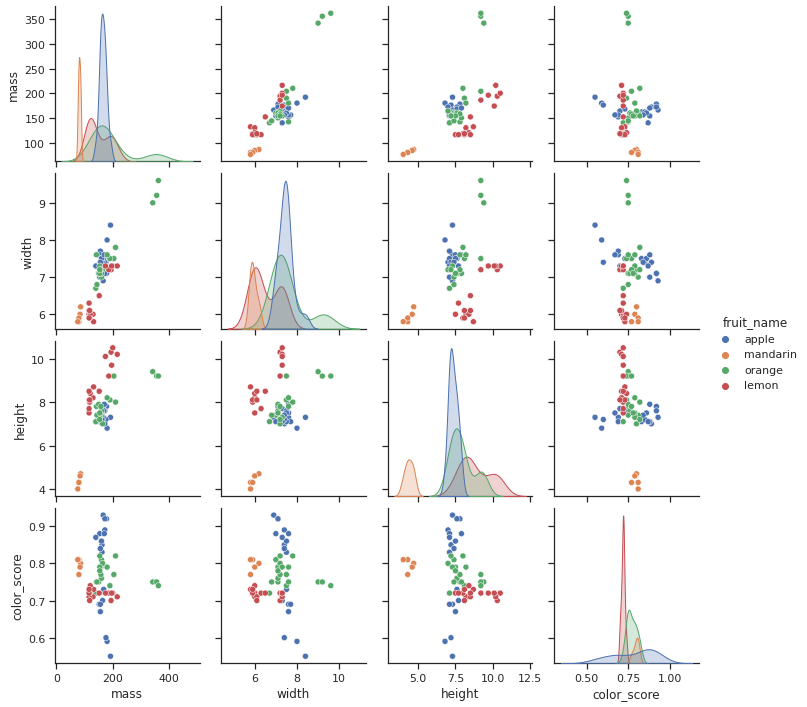

In [33]:
sns.set_theme(style="ticks")
df=data.iloc[:,[1,2,3,4,5]]
sns.pairplot(df, hue="fruit_name")

In [34]:
import math
def euclideanDistance(ins1,ins2,length):
  distance=0
  for x in range(length):
    distance+=pow((ins1[x]-ins2[x]),2)
  return math.sqrt(distance)

In [35]:
import operator
def getNeighbors(trainingset,testinst,k):
  distances = []
  length = len(testinst)-1
  for x in range(len(trainingset)):
    dist = euclideanDistance(testinst,trainingset[x],length)
    distances.append((trainingset[x],dist))
  distances.sort(key=operator.itemgetter(1))
  neighbors = []
  for x in range(k):
    neighbors.append(distances[x][0])
  return neighbors

In [36]:
import operator
def getResponse(neighbors):
  classvotes = {}
  for x in range(len(neighbors)):
    response = neighbors[x][-1]
    if response in classvotes:
      classvotes[response]+=1
    else:
      classvotes[response]=1
  sortedvotes = sorted(classvotes.items(),key=operator.itemgetter(1),reverse=True)
  return sortedvotes[0][0]

In [28]:
def main():
  prediction=[]
  k=4
  from sklearn.model_selection import train_test_split
  data = pd.read_excel("/content/fruits.xlsx")
  data = data.iloc[:,[2,3,4,5,0]]
  #data['fruit_label'].apply(lambda x: float(x))
  train, test = train_test_split(data, test_size=0.3)
  print('Train:' + repr(len(train)))
  print('Test:' + repr(len(test)))
  train=train.values.tolist()
  test=test.values.tolist()
  #print(test)
  
  for x in range(len(test)):
    neighbors = getNeighbors(train,test[x],k)
    result = getResponse(neighbors)
    prediction.append(result)
    predicted=result
    actual=test[x][-1]
    print('predicted= ' + repr(result) + 'actual= ' + repr(test[x][-1]))
   
 
  new_data=[[190,8,7,0.8],[170,6,70.55],[76,5,6,0.7]]
  print("Test with new data")
  for x in range(len(new_data)):
    neighbors = getNeighbors(train,new_data[x],k)
    result = getResponse(neighbors)
    prediction.append(result)
    print('predicted= ' + repr(result))
  print(' accuracy')
  correct=0
  for x in range(len(test)):
     if test[x][-1] == prediction[x]:
       correct+=1
  return(correct/float(len(test)))*100
  
main()


Train:41
Test:18
predicted= 2.0actual= 2.0
predicted= 3.0actual= 3.0
predicted= 4.0actual= 4.0
predicted= 4.0actual= 4.0
predicted= 1.0actual= 1.0
predicted= 3.0actual= 3.0
predicted= 1.0actual= 3.0
predicted= 1.0actual= 1.0
predicted= 4.0actual= 4.0
predicted= 4.0actual= 3.0
predicted= 4.0actual= 4.0
predicted= 4.0actual= 4.0
predicted= 4.0actual= 4.0
predicted= 2.0actual= 2.0
predicted= 1.0actual= 1.0
predicted= 4.0actual= 4.0
predicted= 4.0actual= 3.0
predicted= 4.0actual= 4.0
Test with new data
predicted= 4.0
predicted= 1.0
predicted= 2.0
 accuracy


83.33333333333334